In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
cities = pd.read_csv('dim_cities.csv')
respond = pd.read_csv('dim_repondents.csv')
servey = pd.read_csv('fact_survey_responses.csv')

In [3]:
cities.head()

,City_ID,City,Tier
0,CT111,Delhi,Tier 1
1,CT112,Mumbai,Tier 1
2,CT113,Bangalore,Tier 1
3,CT114,Chennai,Tier 1
4,CT115,Kolkata,Tier 2


In [4]:
respond.head()

,Respondent_ID,Name,Age,Gender,City_ID
0,120031,Aniruddh Issac,15-18,Female,CT117
1,120032,Trisha Rout,19-30,Male,CT118
2,120033,Yuvraj Virk,15-18,Male,CT116
3,120034,Pranay Chand,31-45,Female,CT113
4,120035,Mohanlal Joshi,19-30,Female,CT120


In [7]:
servey.head()

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,...,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,...,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late


In [8]:
respond.shape,servey.shape

((10000, 5), (10000, 23))

In [9]:
respond.isnull().sum(),servey.isnull().sum()

(Respondent_ID    0
 Name             0
 Age              0
 Gender           0
 City_ID          0
 dtype: int64,
 Response_ID                       0
 Respondent_ID                     0
 Consume_frequency                 0
 Consume_time                      0
 Consume_reason                    0
 Heard_before                      0
 Brand_perception                  0
 General_perception                0
 Tried_before                      0
 Taste_experience                  0
 Reasons_preventing_trying         0
 Current_brands                    0
 Reasons_for_choosing_brands       0
 Improvements_desired              0
 Ingredients_expected              0
 Health_concerns                   0
 Interest_in_natural_or_organic    0
 Marketing_channels                0
 Packaging_preference              0
 Limited_edition_packaging         0
 Price_range                       0
 Purchase_location                 0
 Typical_consumption_situations    0
 dtype: int64)

In [5]:
data = pd.merge(respond,servey,on = 'Respondent_ID')
dat = pd.merge(data,cities,on='City_ID')

In [6]:
data = dat[dat['Current_brands'] == 'CodeX']

In [14]:
data.shape

(980, 29)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Respondent_ID                   10000 non-null  int64 
 1   Name                            10000 non-null  object
 2   Age                             10000 non-null  object
 3   Gender                          10000 non-null  object
 4   City_ID                         10000 non-null  object
 5   Response_ID                     10000 non-null  int64 
 6   Consume_frequency               10000 non-null  object
 7   Consume_time                    10000 non-null  object
 8   Consume_reason                  10000 non-null  object
 9   Heard_before                    10000 non-null  object
 10  Brand_perception                10000 non-null  object
 11  General_perception              10000 non-null  object
 12  Tried_before                    10000 non-null 

In [50]:
CodeX_consumer = data[data['Current_brands'] == 'CodeX']
CodeX_consumer.head()

,Respondent_ID,Name,Age,Gender,City_ID,Response_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
10,120041,Misha Warrior,19-30,Female,CT113,103011,2-3 times a week,Before exercise,To combat fatigue,No,...,Reduced sugar content,Guarana,Yes,Yes,Online ads,Compact and portable cans,Yes,50-99,Supermarkets,Sports/exercise
16,120047,Ojas Char,19-30,Male,CT112,103017,Rarely,Before exercise,To boost performance,Yes,...,Wider range of flavors,Sugar,No,Yes,Print media,Innovative bottle design,Not Sure,50-99,Supermarkets,Studying/working late
32,120063,Diya Sunder,19-30,Male,CT114,103033,Daily,Before exercise,Increased energy and focus,No,...,Wider range of flavors,Guarana,No,Not Sure,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Sports/exercise
34,120065,Shamik Chaudry,19-30,Male,CT115,103035,2-3 times a week,For mental alertness,To enhance sports performance,No,...,More natural ingredients,Vitamins,Yes,No,Online ads,Compact and portable cans,Not Sure,50-99,Supermarkets,Social outings/parties
35,120066,Yashvi Deo,19-30,Female,CT116,103036,2-3 times a month,Throughout the day,To boost performance,No,...,Wider range of flavors,Caffeine,Yes,Not Sure,Other,Innovative bottle design,No,100-150,Supermarkets,Sports/exercise


In [52]:
CodeX_consumer.shape

(980, 27)

In [13]:
data.columns

Index(['Respondent_ID', 'Name', 'Age', 'Gender', 'City_ID', 'Response_ID',
       'Consume_frequency', 'Consume_time', 'Consume_reason', 'Heard_before',
       'Brand_perception', 'General_perception', 'Tried_before',
       'Taste_experience', 'Reasons_preventing_trying', 'Current_brands',
       'Reasons_for_choosing_brands', 'Improvements_desired',
       'Ingredients_expected', 'Health_concerns',
       'Interest_in_natural_or_organic', 'Marketing_channels',
       'Packaging_preference', 'Limited_edition_packaging', 'Price_range',
       'Purchase_location', 'Typical_consumption_situations'],
      dtype='object')

In [18]:
data['Current_brands'].unique()

array(['Blue Bull', 'Bepsi', 'Sky 9', 'Cola-Coka', 'Gangster', 'CodeX',
       'Others'], dtype=object)

In [25]:
e = CodeX_consumer.groupby(['Gender'])['Current_brands'].agg('count').sort_values(ascending= False)
e

Gender
Male          6038
Female        3455
Non-binary     507
Name: Current_brands, dtype: int64

<AxesSubplot: xlabel='Gender'>

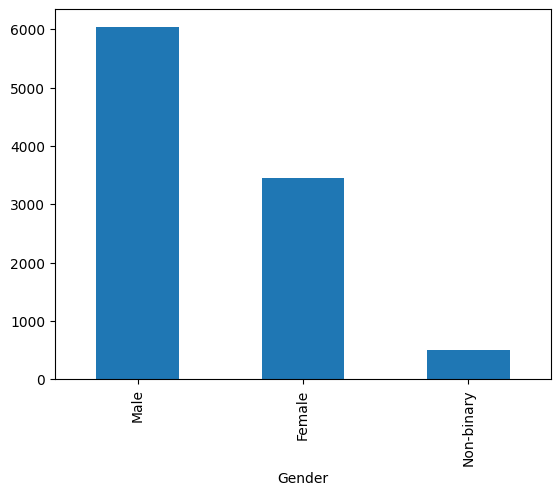

In [26]:
e.plot(kind='bar')

According to statices Male have high consumption of energy drink 

<AxesSubplot: ylabel='Current_brands'>

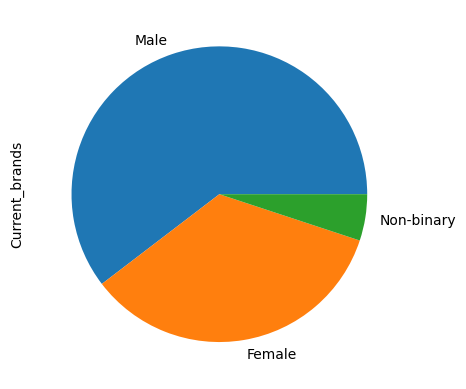

In [27]:
e.plot(kind = 'pie')

In [33]:
codex_consumers  = CodeX_consumer[CodeX_consumer['Current_brands']=='CodeX'].groupby(['Gender'])['Current_brands'].agg('count').sort_values(ascending= False)
codex_consumers

Gender
Male          590
Female        352
Non-binary     38
Name: Current_brands, dtype: int64

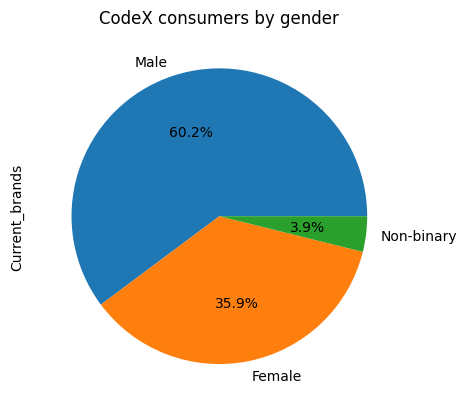

In [37]:
codex_consumers.plot(kind='pie',autopct = '%1.1f%%')
plt.title("CodeX consumers by gender")
plt.show()

## as the statics the males are Dominating in Enery Drink Consumers. Our target audience will be Male

In [54]:
consumerby_age = CodeX_consumer.groupby('Age')['Current_brands'].count().sort_values(ascending = False)
consumerby_age 

Age
19-30    540
31-45    242
15-18    135
46-65     37
65+       26
Name: Current_brands, dtype: int64

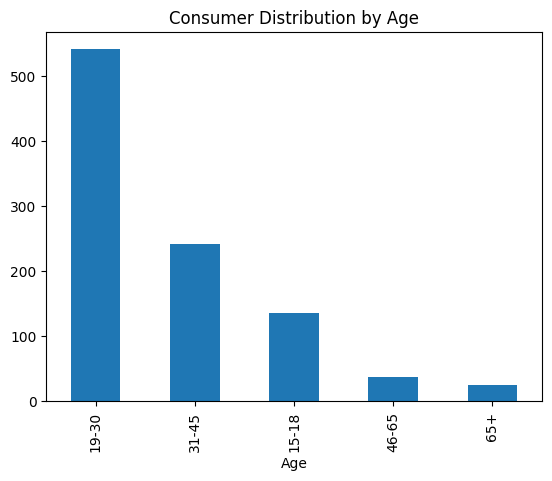

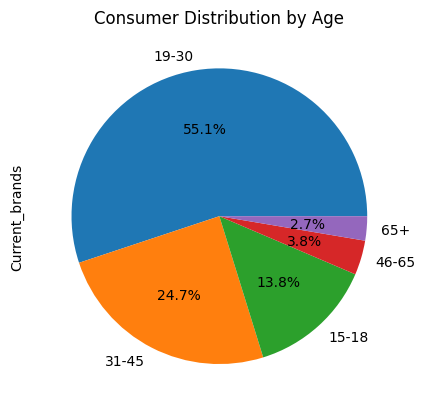

In [58]:
consumerby_age.plot(kind='bar')
plt.title("Consumer Distribution by Age")
plt.show()

consumerby_age.plot(kind='pie',autopct = '%1.1f%%')
plt.title("Consumer Distribution by Age")
plt.show()


 as 31-45 age group consume large volume of CodeX product

In [80]:
Marketing_channels = CodeX_consumer[CodeX_consumer['Age'].str.contains('19-30')].groupby([ 'Marketing_channels'])['Marketing_channels'].count().sort_values(ascending=False)
Marketing_channels

Marketing_channels
Online ads            269
TV commercials        121
Other                  61
Outdoor billboards     59
Print media            30
Name: Marketing_channels, dtype: int64

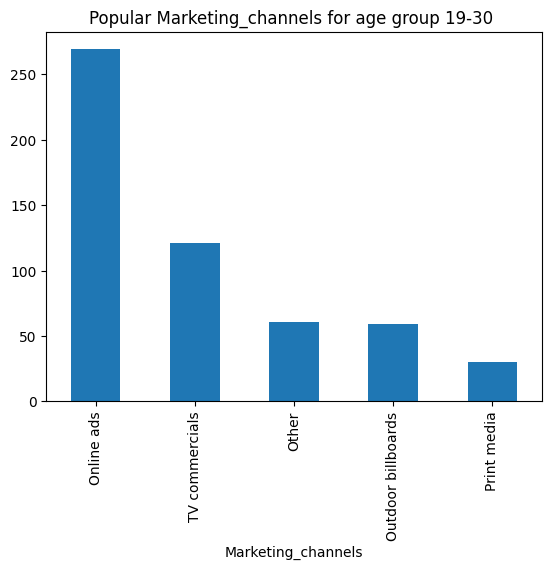

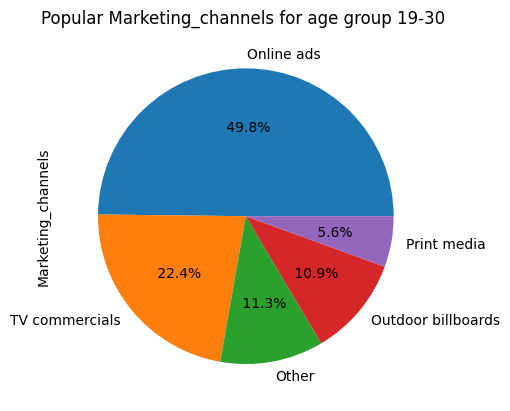

In [84]:
Marketing_channels.plot(kind= 'bar')
plt.title('Popular Marketing_channels for age group 19-30 ')
plt.show()

Marketing_channels.plot(kind= 'pie',autopct =' %1.1f%%')
plt.title('Popular Marketing_channels for age group 19-30 ')
plt.show()

# as Online ads occpuy the highest viewer for the advertising 

In [15]:
data.columns

Index(['Respondent_ID', 'Name', 'Age', 'Gender', 'City_ID', 'Response_ID',
       'Consume_frequency', 'Consume_time', 'Consume_reason', 'Heard_before',
       'Brand_perception', 'General_perception', 'Tried_before',
       'Taste_experience', 'Reasons_preventing_trying', 'Current_brands',
       'Reasons_for_choosing_brands', 'Improvements_desired',
       'Ingredients_expected', 'Health_concerns',
       'Interest_in_natural_or_organic', 'Marketing_channels',
       'Packaging_preference', 'Limited_edition_packaging', 'Price_range',
       'Purchase_location', 'Typical_consumption_situations', 'City', 'Tier'],
      dtype='object')

In [17]:
data['Ingredients_expected'].unique()

array(['Caffeine', 'Vitamins', 'Guarana', 'Sugar'], dtype=object)

<AxesSubplot: >

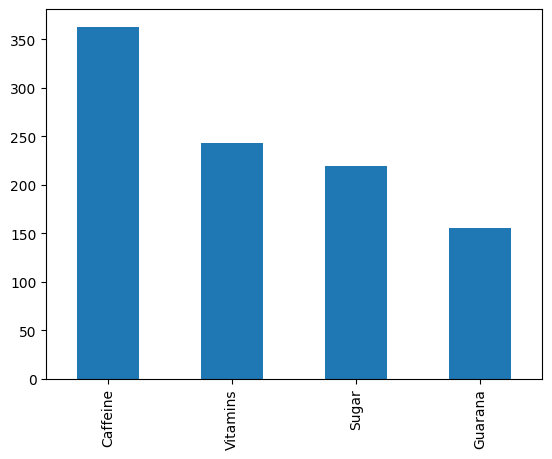

In [21]:
data['Ingredients_expected'].value_counts().plot(kind='bar')

<AxesSubplot: >

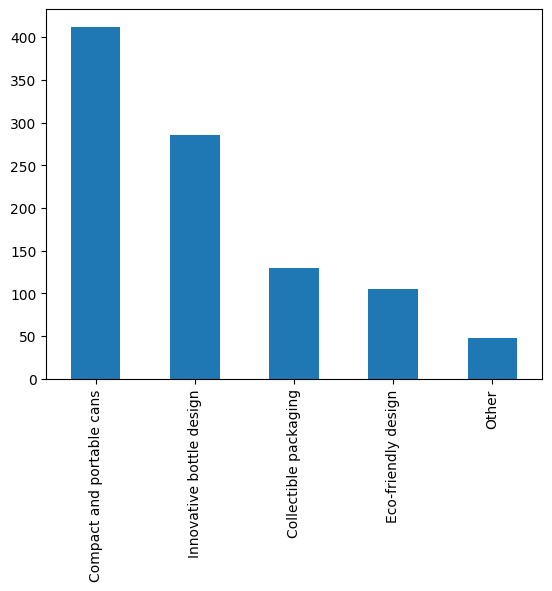

In [22]:
data['Packaging_preference'].value_counts().plot(kind = 'bar')

<AxesSubplot: >

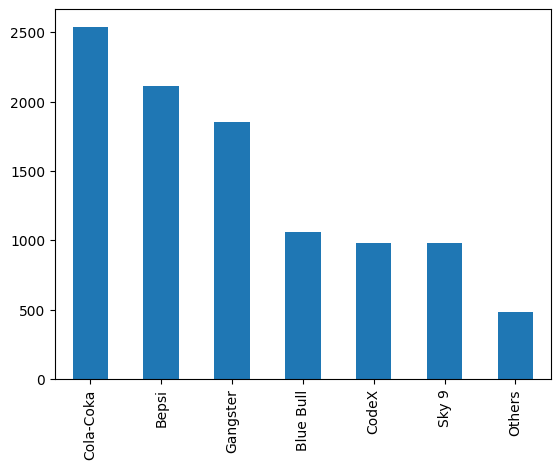

In [26]:
dat['Current_brands'].value_counts().plot(kind='bar')


In [32]:
reason = dat.groupby(['Current_brands','Reasons_for_choosing_brands'])['Reasons_for_choosing_brands'].count()

<AxesSubplot: xlabel='Current_brands,Reasons_for_choosing_brands'>

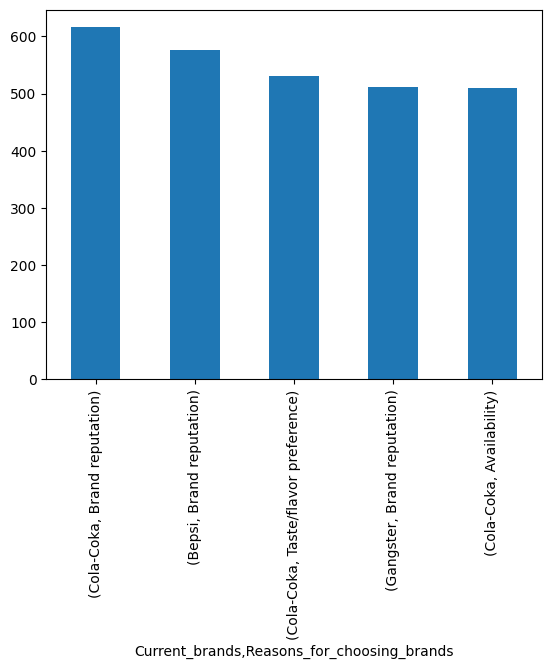

In [35]:
top_reson = reason.nlargest(5)
top_reson.plot(kind='bar')

As the brand Reputation playes a major role in buying a drink

In [41]:
marketing  = dat.groupby('Marketing_channels')['Marketing_channels'].count().sort_values(ascending = False)

<AxesSubplot: xlabel='Marketing_channels'>

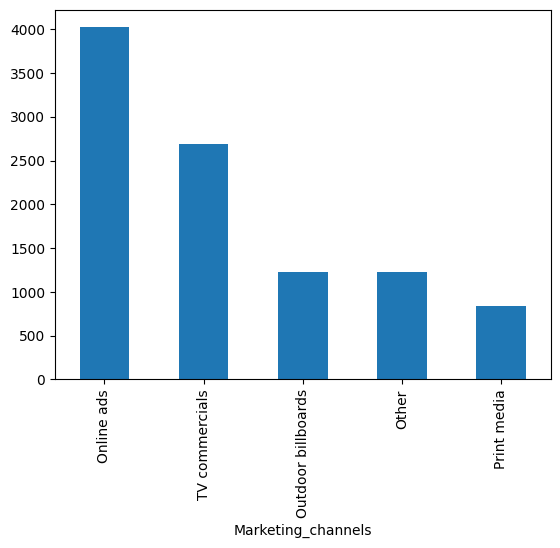

In [42]:
marketing.plot(kind = 'bar')

In [45]:
channel_counts = data['Marketing_channels'].value_counts()

# Calculate the percentage of respondents reached by each marketing channel
channel_percentages = channel_counts / len(data) * 100
channel_percentages

Online ads            41.938776
TV commercials        26.632653
Outdoor billboards    12.142857
Other                 11.836735
Print media            7.448980
Name: Marketing_channels, dtype: float64

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 10 to 9991
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Respondent_ID                   980 non-null    int64 
 1   Name                            980 non-null    object
 2   Age                             980 non-null    object
 3   Gender                          980 non-null    object
 4   City_ID                         980 non-null    object
 5   Response_ID                     980 non-null    int64 
 6   Consume_frequency               980 non-null    object
 7   Consume_time                    980 non-null    object
 8   Consume_reason                  980 non-null    object
 9   Heard_before                    980 non-null    object
 10  Brand_perception                980 non-null    object
 11  General_perception              980 non-null    object
 12  Tried_before                    980 non-null    

In [52]:
opinion = data['Brand_perception'].value_counts().sort_values(ascending = False)
opinion

Neutral     589
Positive    219
Negative    172
Name: Brand_perception, dtype: int64

<AxesSubplot: >

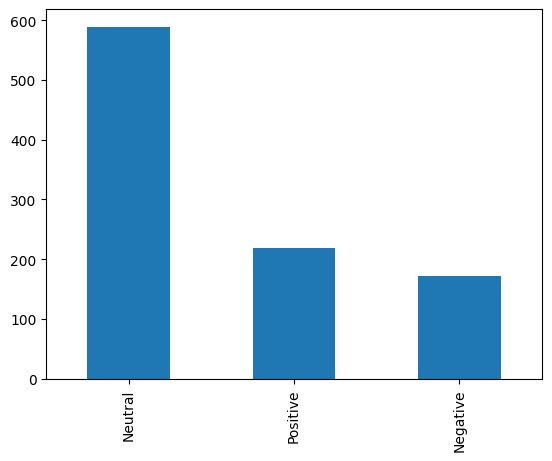

In [51]:
opinion.plot(kind = 'bar')


# as pepole as nural opnion on CodeX Brand

In [55]:
Taste_experience            = data['Taste_experience'].value_counts().sort_values(ascending = False)

In [56]:
Taste_experience  

3    286
4    248
5    191
2    148
1    107
Name: Taste_experience, dtype: int64

<AxesSubplot: >

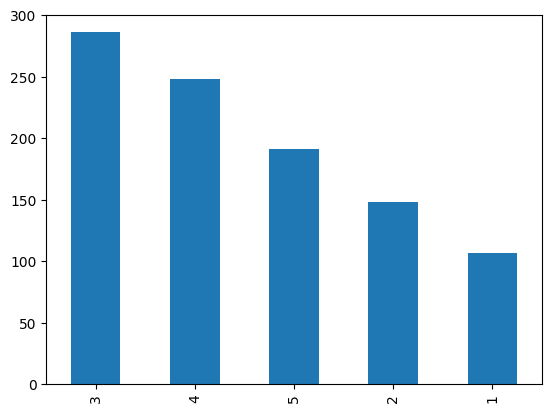

In [58]:
Taste_experience.plot(kind = 'bar')

as most of pepole rated 3 star as it nither popular nor unpopulr

In [62]:
top_cities = data['City'].value_counts()
top_cities

Bangalore    292
Hyderabad    182
Mumbai       156
Pune          92
Chennai       92
Kolkata       48
Ahmedabad     45
Delhi         40
Jaipur        28
Lucknow        5
Name: City, dtype: int64

<AxesSubplot: >

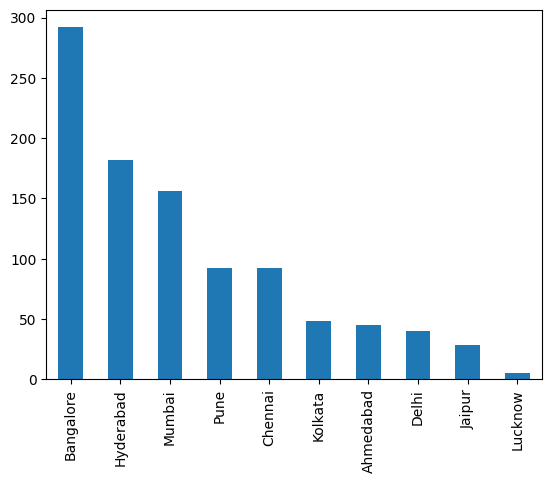

In [63]:
top_cities.plot(kind = 'bar')

### as Banglore has highly purchased our brade 
so it can highly focued country 

In [67]:
purchase_place = data['Purchase_location'].value_counts()
purchase_place

Supermarkets                436
Online retailers            248
Gyms and fitness centers    143
Local stores                 87
Other                        66
Name: Purchase_location, dtype: int64

<AxesSubplot: >

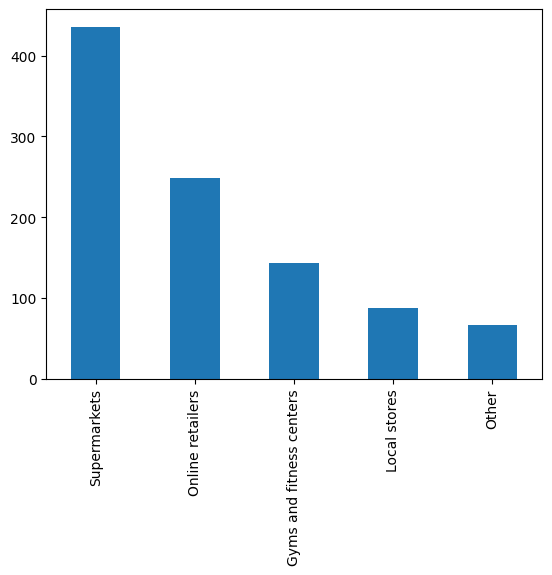

In [68]:
purchase_place.plot(kind = 'bar')

# AS supermarkets as dense population of buyer

In [7]:
consumers = data['Typical_consumption_situations'].value_counts()
consumers

Sports/exercise           450
Studying/working late     320
Social outings/parties    128
Other                      60
Driving/commuting          22
Name: Typical_consumption_situations, dtype: int64

<AxesSubplot: >

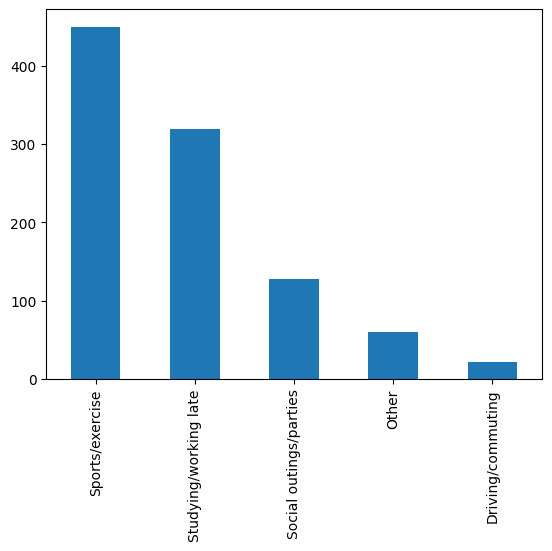

In [8]:
consumers.plot(kind = 'bar')

In [ ]:
as 